# 🟦 Rot-Schwarz-Baum (Red-Black Tree)

## 1️⃣ Grundidee
Ein Rot-Schwarz-Baum ist ein **selbstbalancierender binärer Suchbaum**, der durch **Farben (rot/schwarz)** bestimmte Eigenschaften einhält, um die Baumhöhe zu begrenzen.

Ziel ist es, den Baum **annähernd balanciert** zu halten und dadurch **garantierte logarithmische Laufzeiten** zu erreichen – mit weniger Rotationen als beim AVL-Baum.

---

## 2️⃣ Voraussetzungen
- Elemente müssen **vergleichbar** sein (Ordnung <, >)
- Duplikate nur mit klarer Regel (oder verbieten)
- Jeder Knoten besitzt eine **Farbe**: rot oder schwarz

---

## 3️⃣ Laufzeiten & Eigenschaften

| Eigenschaft | Wert |
|------------|------|
| Suche | O(log n) |
| Einfügen | O(log n) |
| Löschen | O(log n) |
| Speicherbedarf | O(n) |
| In-place | nein |
| Stabil | nein |

**Hinweis:**
Die Höhe eines Rot-Schwarz-Baums ist höchstens **2 · log₂(n + 1)**.

---

## 4️⃣ Rot-Schwarz-Eigenschaften (klassischer Prüfungsstoff)

Ein Rot-Schwarz-Baum erfüllt **immer** folgende Regeln:

1. Jeder Knoten ist **rot oder schwarz**
2. Die **Wurzel ist schwarz**
3. Alle **Blätter (NIL-Knoten)** sind schwarz
4. **Keine zwei roten Knoten** stehen direkt hintereinander
5. Jeder Pfad von einem Knoten zu seinen NIL-Blättern enthält **gleich viele schwarze Knoten**

➡️ Diese Regeln garantieren die logarithmische Höhe.

---

## 5️⃣ Schritt-für-Schritt-Beispiel

Wir fügen ein:
```
[10, 20, 30]
```

### Nach normalem BST-Insert
```
10(B)
   \
    20(R)
        \
         30(R)   ❌ Regel 4 verletzt
```

### Rebalancing (Rotation + Umfärben)
```
     20(B)
    /   \
 10(R)  30(R)
```

Baum ist wieder gültig.

Das folgende Bild zeigt die möglichen Ausgangssituationen. Korrigiert wird immer zum recht platzierten Baum.

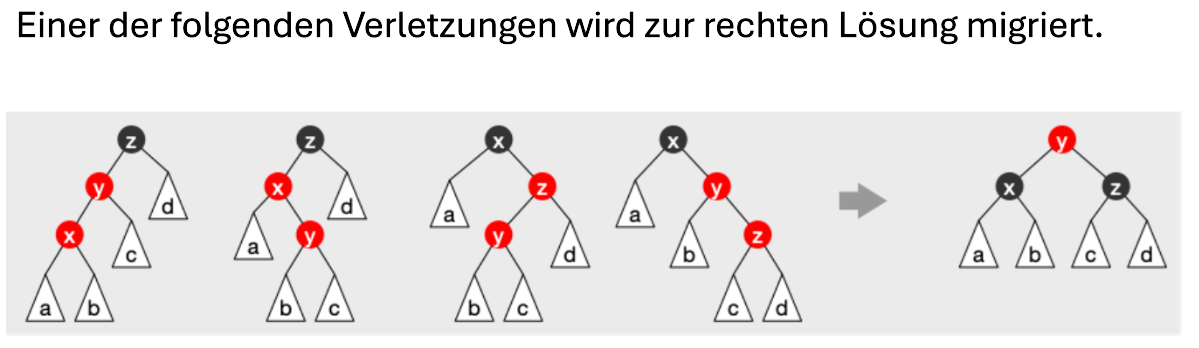

Case Analysis for fixing insertions:
- Case 1: Recoloring and Propagating Upwards
  - If the parent and uncle of the new node are both red, recolor the parent and uncle to black, and the  grandparent to red. if grandparent is root, then dont change to red. Then, recursively apply the fix-up to the grandparent.
- Case 2: Rotation and Recoloring
  - einfach das bild umsetzen oder so, keine Ahnung...

### Rot-Schwarz-Baum – Algorithmus in Worten (Grundidee)

Ein Rot-Schwarz-Baum ist ein selbstbalancierender binärer Suchbaum.\
Jeder Knoten besitzt zusätzlich eine Farbe: rot oder schwarz.\
Durch feste Farbregeln wird sichergestellt,\
dass der Baum annähernd ausgeglichen bleibt.\
Dadurch sind Suche, Einfügen und Löschen stets effizient.

### Rot-Schwarz-Baum – Eigenschaften in Worten (sehr prüfungsrelevant)

Jeder Knoten ist entweder rot oder schwarz.\
Die Wurzel des Baumes ist immer schwarz.\
Alle Blätter (NIL-Knoten) gelten als schwarz.\
Ein roter Knoten darf keinen roten Eltern- oder Kindknoten haben.\
Jeder Pfad von einem Knoten zu einem Blatt\
enthält die gleiche Anzahl schwarzer Knoten.\
Diese Regeln verhindern, dass der Baum zu stark entartet.

### Einfügen in einen Rot-Schwarz-Baum – Algorithmus in Worten

Der neue Wert wird zunächst wie in einem normalen binären Suchbaum eingefügt.\
Der neu eingefügte Knoten wird rot markiert.\
Anschließend werden die Rot-Schwarz-Eigenschaften überprüft.\
Verstößt der Baum gegen eine Regel,\
wird der Baum durch Umlackieren und Rotationen korrigiert.\
Dieser Vorgang wird fortgesetzt,\
bis alle Rot-Schwarz-Regeln wieder erfüllt sind.\
Am Ende ist der Baum wieder gültig und balanciert.

### Korrigieren beim Einfügen – Algorithmus in Worten

Tritt ein Regelverstoß auf, wird die Beziehung\
zwischen Knoten, Elternknoten und Onkelknoten betrachtet.\
Ist der Onkelknoten rot, werden die beteiligten Knoten umgefärbt.\
Ist der Onkelknoten schwarz, werden Rotationen durchgeführt.\
Dabei bleibt die Ordnungsregel des binären Suchbaums erhalten.\
Durch diese Schritte wird der Baum schrittweise repariert.

---

## 6️⃣ Besonderheiten / Prüfungsrelevante Hinweise
- Weniger strikt balanciert als AVL
- Dafür **weniger Rotationen**
- Sehr häufig in **Standardbibliotheken**
  - z. B. Java `TreeMap`, `TreeSet`
- Fokus in Prüfungen liegt oft auf **Regeln**, nicht auf Code

---

## 7️⃣ Vor- und Nachteile

### Vorteile
- garantierte Laufzeiten O(log n)
- weniger Rotationen als AVL
- gut für häufige Einfüge- und Löschoperationen

### Nachteile
- komplexe Regeln
- schwierige Implementierung
- schlechtere Suchperformance als AVL (konstanten Faktor)

---

## 🧠 Merksatz für die Prüfung
*Rot-Schwarz-Bäume balancieren sich über Farbregeln statt Höhen und garantieren logarithmische Laufzeiten mit weniger Rotationen als AVL.*

---

## 8️⃣ Python-Implementierung (vereinfachtes Lehrbeispiel)


In [1]:
RED = True
BLACK = False

class Node:
    def __init__(self, value, color=RED):
        self.value = value
        self.color = color
        self.left = None
        self.right = None
        self.parent = None


class RedBlackTree:
    def __init__(self):
        self.NIL = Node(None, BLACK)
        self.root = self.NIL

    def insert(self, value):
        node = Node(value)
        node.left = self.NIL
        node.right = self.NIL

        parent = None
        current = self.root

        while current != self.NIL:
            parent = current
            if value < current.value:
                current = current.left
            else:
                current = current.right

        node.parent = parent
        if parent is None:
            self.root = node
        elif value < parent.value:
            parent.left = node
        else:
            parent.right = node

        node.color = RED
        self.fix_insert(node)

    def fix_insert(self, node):
        while node.parent and node.parent.color == RED:
            if node.parent == node.parent.parent.left:
                uncle = node.parent.parent.right
                if uncle.color == RED:
                    node.parent.color = BLACK
                    uncle.color = BLACK
                    node.parent.parent.color = RED
                    node = node.parent.parent
                else:
                    if node == node.parent.right:
                        node = node.parent
                        self.rotate_left(node)
                    node.parent.color = BLACK
                    node.parent.parent.color = RED
                    self.rotate_right(node.parent.parent)
            else:
                uncle = node.parent.parent.left
                if uncle.color == RED:
                    node.parent.color = BLACK
                    uncle.color = BLACK
                    node.parent.parent.color = RED
                    node = node.parent.parent
                else:
                    if node == node.parent.left:
                        node = node.parent
                        self.rotate_right(node)
                    node.parent.color = BLACK
                    node.parent.parent.color = RED
                    self.rotate_left(node.parent.parent)

        self.root.color = BLACK

    def rotate_left(self, x):
        y = x.right
        x.right = y.left
        if y.left != self.NIL:
            y.left.parent = x
        y.parent = x.parent
        if x.parent is None:
            self.root = y
        elif x == x.parent.left:
            x.parent.left = y
        else:
            x.parent.right = y
        y.left = x
        x.parent = y

    def rotate_right(self, y):
        x = y.left
        y.left = x.right
        if x.right != self.NIL:
            x.right.parent = y
        x.parent = y.parent
        if y.parent is None:
            self.root = x
        elif y == y.parent.right:
            y.parent.right = x
        else:
            y.parent.left = x
        x.right = y
        y.parent = x